In [1]:
# Import dependencies
from statistics import mode
import fastf1 as ff1
from fastf1 import plotting
from fastf1 import utils

from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

import numpy as np
import pandas as pd
from requests import Session


In [2]:
ff1.Cache.enable_cache('cache') 

In [22]:
year=2022
grand_prix='Imola'
session='R'
driver_1 = 'SAI'
driver_2 = 'LEC'

In [23]:
session_data = ff1.get_session(year, grand_prix, session)
session_data.load()
laps_driver_1 = session_data.laps.pick_driver(driver_1)
laps_driver_2 = session_data.laps.pick_driver(driver_2)

core           INFO 	Loading data for Emilia Romagna Grand Prix - Race [v2.2.5]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
api            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '11', '4', '63', '77', '16', '22', '5', '20', '18', '23', '10', '44', '31', '24', '6', '47', '3', '14', '55']


In [26]:
laps_driver_2.head()

,Time,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,...,IsPersonalBest,Compound,TyreLife,FreshTyre,LapStartTime,Team,Driver,TrackStatus,IsAccurate,LapStartDate
315,0 days 01:03:59.435000,16,NaT,1.0,1.0,0 days 00:26:29.172000,NaT,NaT,0 days 00:00:32.434000,0 days 00:00:48.366000,...,False,INTERMEDIATE,1.0,True,0 days 01:02:03.225000,Ferrari,LEC,24,False,2022-04-24 13:03:03.238
316,0 days 01:06:25.949000,16,0 days 00:02:26.514000,2.0,1.0,NaT,NaT,0 days 00:00:52.511000,0 days 00:00:49.401000,0 days 00:00:44.602000,...,False,INTERMEDIATE,2.0,True,0 days 01:03:59.435000,Ferrari,LEC,4,False,2022-04-24 13:04:59.448
317,0 days 01:08:45.221000,16,0 days 00:02:19.272000,3.0,1.0,NaT,NaT,0 days 00:00:45.324000,0 days 00:00:46.153000,0 days 00:00:47.795000,...,False,INTERMEDIATE,3.0,True,0 days 01:06:25.949000,Ferrari,LEC,4,False,2022-04-24 13:07:25.962
318,0 days 01:11:06.369000,16,0 days 00:02:21.148000,4.0,1.0,NaT,NaT,0 days 00:00:39.249000,0 days 00:00:47.578000,0 days 00:00:54.321000,...,False,INTERMEDIATE,4.0,True,0 days 01:08:45.221000,Ferrari,LEC,4,False,2022-04-24 13:09:45.234
319,0 days 01:12:39.961000,16,0 days 00:01:33.592000,5.0,1.0,NaT,NaT,0 days 00:00:30.808000,0 days 00:00:31.405000,0 days 00:00:31.379000,...,False,INTERMEDIATE,5.0,True,0 days 01:11:06.369000,Ferrari,LEC,1,False,2022-04-24 13:12:06.382


In [20]:
laps_driver_1[laps_driver_1['LapNumber']==5]['LapTime'].values[0]/ np.timedelta64(1, 's')

124.216

ValueError: x and y must have same first dimension, but have shapes (23,) and (20,)

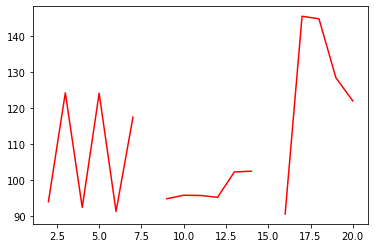

In [21]:
fig, ax = plt.subplots()
ax.plot(laps_driver_1['LapNumber'], laps_driver_1['LapTime']/np.timedelta64(1,'s'), color='red', label=driver_1)
ax.plot(laps_driver_2['LapNumber'], laps_driver_1['LapTime']/np.timedelta64(1,'s'), color='blue', label=driver_2)

ax.set_xlabel('Lap Number')
ax.set_ylabel('Lap Time')

ax.legend()
plt.suptitle(f"Fastest Lap Comparison \n "
    f"{session_data.event['EventName']} {session_data.event.year} Race")
plt.show()

In [25]:
min(laps_driver_1.LapNumber.max(), laps_driver_2.LapNumber.max())

0.0

In [14]:
session_data.laps.LapNumber.max()

63.0